In [1]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
from scipy import optimize
from scipy import stats
plt.style.use("ggplot")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['font.family'] = 'IPAexGothic'

import warnings
warnings.filterwarnings('ignore') # warningが出ないように設定
pd.set_option("display.max_rows", None) # pandasの表示上限をなくす
pd.set_option("display.max_columns", None) # pandasの表示上限をなくす
import pickle

f = open("mean_vec_list.binaryfile",'rb')
mean_vec_list = pickle.load(f)

In [2]:
import gensim

model = gensim.models.Word2Vec.load("latest-ja-word2vec-gensim-model/word2vec.gensim.model")

In [3]:
# 入力単語

imput_word_list = ['コーヒー', "スイーツ", "アイスクリーム", "有名", "店舗"]

In [4]:
result_vec_list  = []

for w in imput_word_list:

    w_to_v = model.wv[w]

    for mean_vec in mean_vec_list:
        result_vec_plus = w_to_v - mean_vec 
        result_vec_minus =   w_to_v + mean_vec 
    
        result_vec_list.append(result_vec_plus)
        result_vec_list.append(result_vec_minus)

In [5]:
# 関係ベクトルと類似度が高い単語をn個上位表示

import numpy as np

output_word_list = []
max_n = 2

for vec in result_vec_list:
    most_similar = np.array(list(model.wv.most_similar([vec], [], max_n)))
    
    output_word_list.extend(most_similar[:,0].tolist())

In [6]:
#インプットした単語と同じ単語は除去

for imput_word in imput_word_list:
    output_word_list = [output_word for output_word in output_word_list if output_word != imput_word]
    print(len(output_word_list))

17497
17195
16959
16137
15428


In [7]:
# 登録済固有名詞リスト

f = open("koyuu_noun_list.binaryfile",'rb')
noun_list = pickle.load(f)

In [8]:
# 固有名詞リスト外の単語は除去

output_word_list = [output_word for output_word in output_word_list if noun_list.count(output_word)>=1]

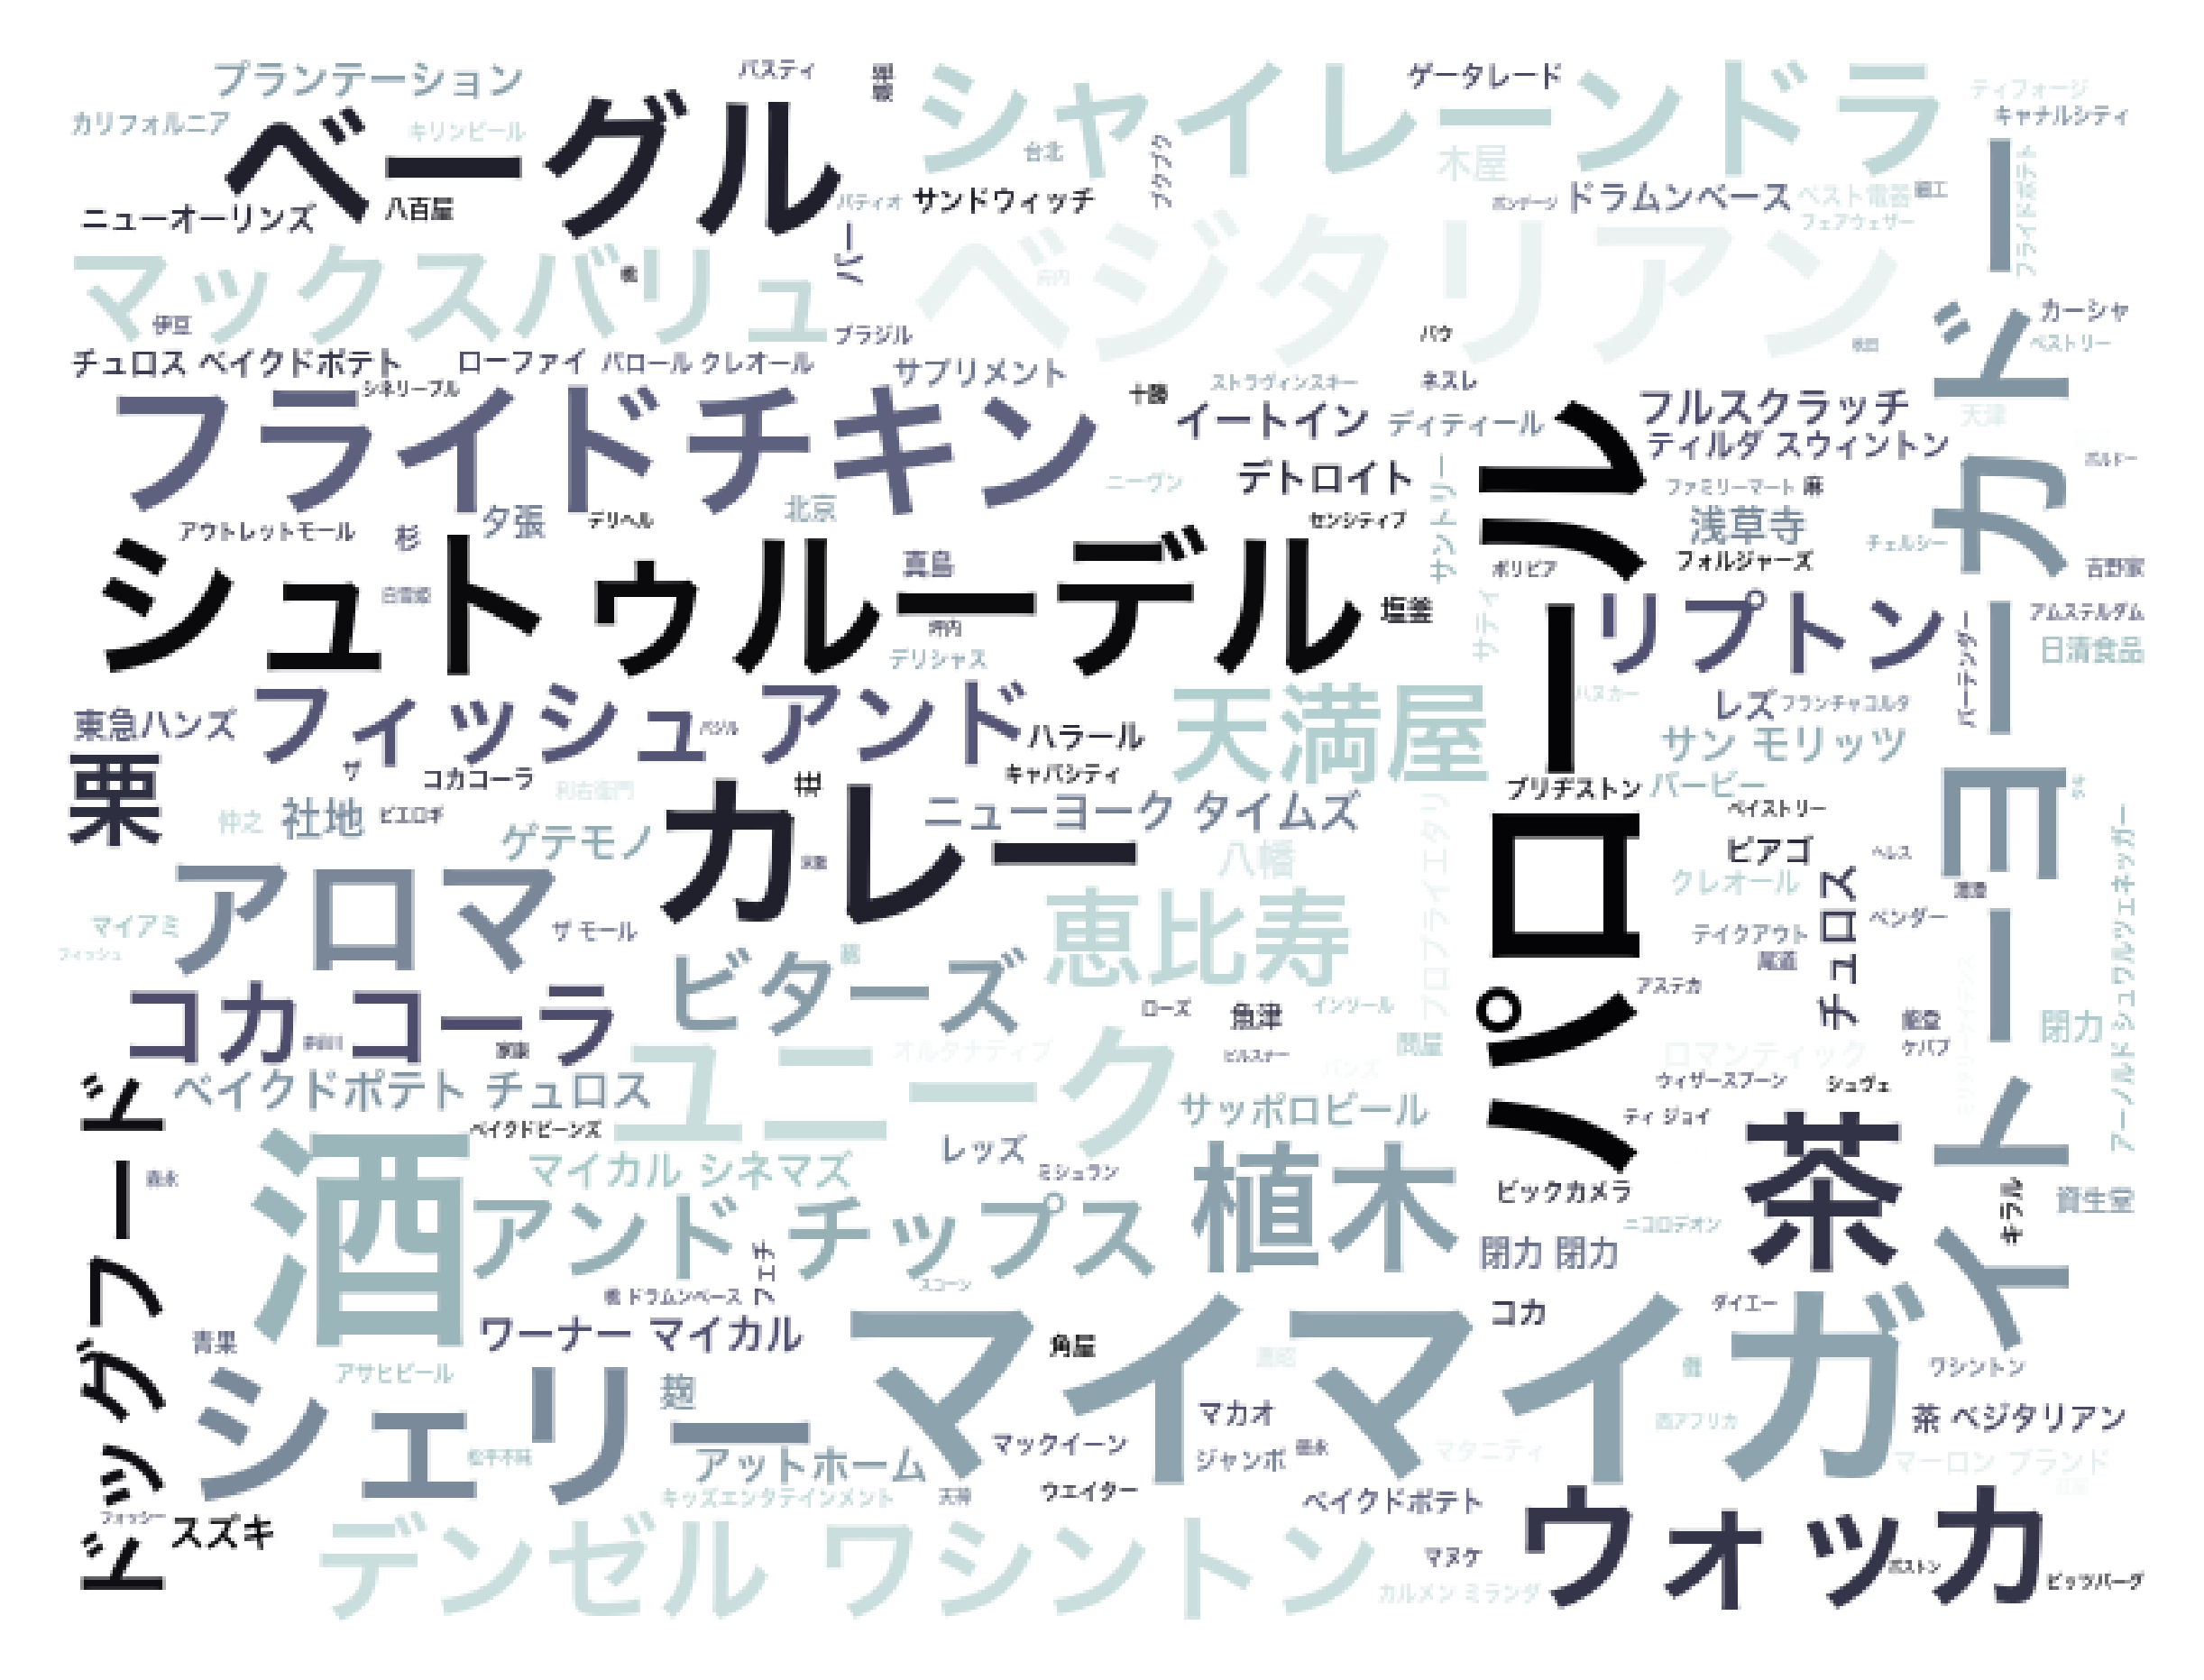

In [9]:
# リストを文字列に変換
word_chain = ' '.join(output_word_list)

font = "/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc"

# ワードクラウド作成
W = WordCloud(width=640, height=480, background_color='white', colormap='bone',font_path =font).generate(word_chain)

plt.figure(figsize=(5,5), dpi=300)
plt.axis("off")
#plt.imshow(W, interpolation="bilinear")
plt.imshow(W)
plt.show()